# Linear Regression with Ordinary Least Squares

In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #import linear regression model


`LinearRegression` fits a linear model with coefficients
$w = (w_1, ..., w_p)$ to minimize the residual sum
of squares between the observed targets in the dataset, and the
targets predicted by the linear approximation. Mathematically it
solves a problem of the form:

$\min_{w} || X w - y||_2^2$

`LinearRegression` will take in its ``fit`` method arrays ``X``, ``y``
and will store the coefficients $w$ of the linear model in its

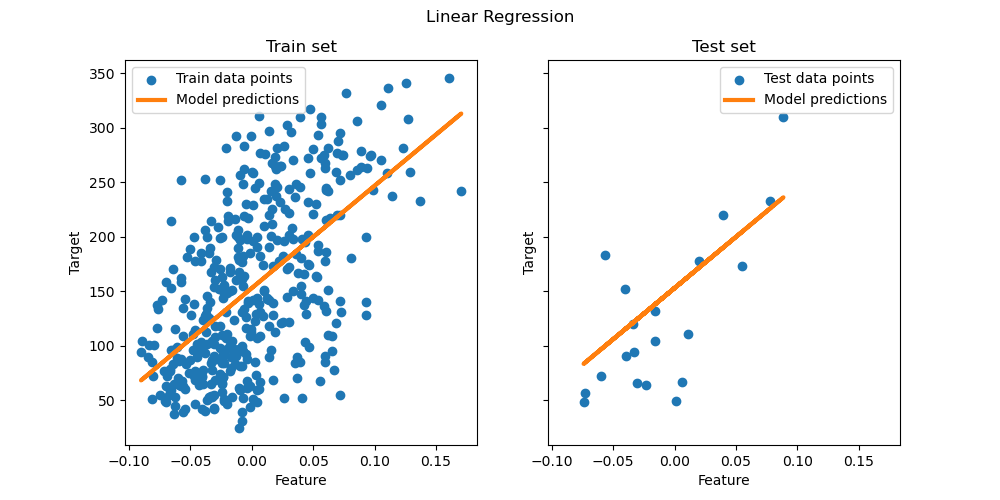
*

### Handle the data

In [16]:
data = pd.read_csv("augmented_data.csv"); #path to your data csv file
data.head(5)

,LDR,LED
0,242,0
1,256,0
2,254,1
3,255,1
4,261,2


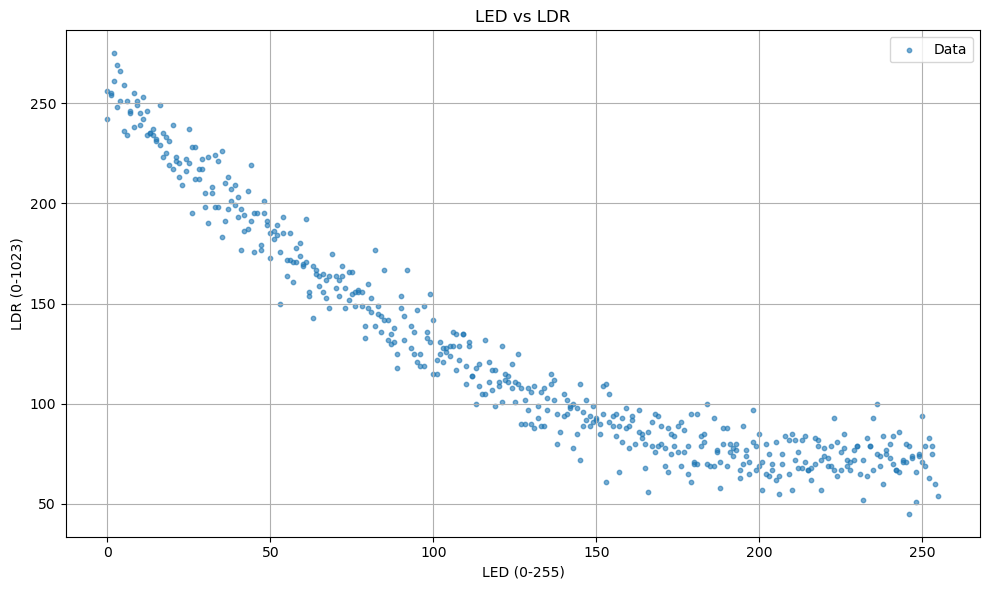

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data[["LED"]], data[["LDR"]], s=10, alpha=0.6, label='Data')
plt.xlabel("LED (0-255)")
plt.ylabel("LDR (0-1023)")
plt.title("LED vs LDR")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split #use to randomly split data

# train = "formative" or "homework" test = "summative"
X_train, X_test, y_train, y_test = train_test_split(data[['LDR']],data[['LED']], test_size=0.33, random_state=42) 


### Train the model

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

### Test the model

In [33]:
model.score(X_test,y_test) #"summative"
LED_predicted = model.predict(data[['LDR']])


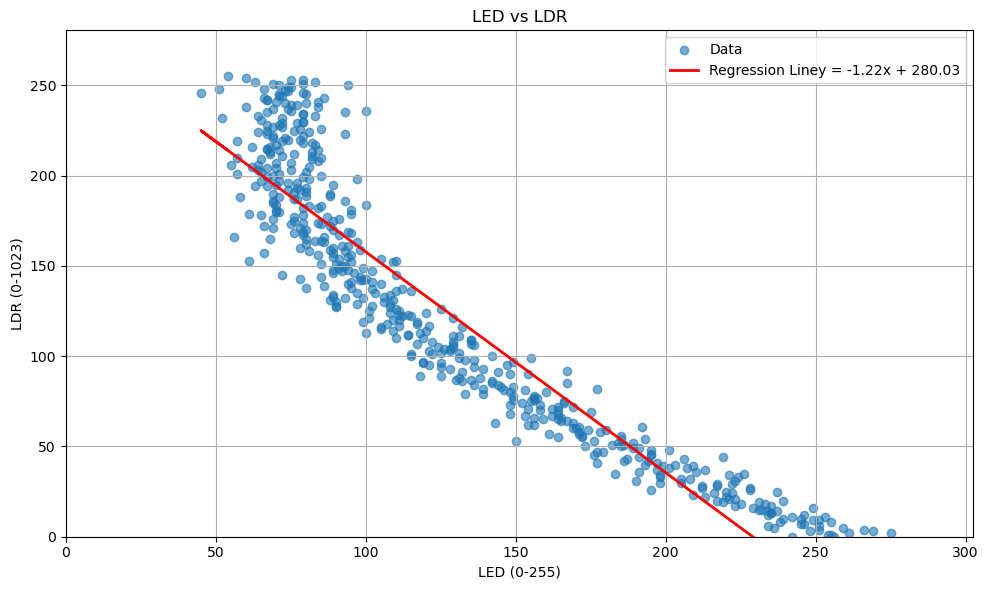

In [49]:
slope = float(model.coef_[0])
intercept = float(model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(data['LDR'], data['LED'], label='Data', alpha=0.6)
plt.plot(data['LDR'], LED_predicted, color='red', linewidth=2, label='Regression Line'+f'y = {slope:.2f}x + {intercept:.2f}')
plt.xlim(0, max(data['LDR']) * 1.1)  
plt.ylim(0, max(data['LED']) * 1.1)
plt.xlabel("LED (0-255)")
plt.ylabel("LDR (0-1023)")
plt.title("LED vs LDR")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()